# Introduction to Bayesian Econometrics

This course will cover the application of Bayesian statistical methods for econometric inference.  Broadly speaking we will

1. Briefly discuss sampling methods for classical statistics
2. Introduce Bayes Rule and Provide an Application 
3. Examine the use of Monte Carlo Markov Chains
    * Link to Bayes Rule
    * Metropolis-Hastings and other Samplers
    * Chain "convergence" and diagnostics
4. Application: OLS, Time-Series Econometrics, Heirarchical Models

The **frequentist paradigm**, arguably the dominant statistical paradigm in the social sciences (and what you all have studied), relies on the following notions:

* $\beta$ is not random but neither is it known.  It is a fixed quantity.
* To uncover information about $\beta$, we observe part of some process (e.g. $\mathbf{y=x\beta+\epsilon}$).
* For statistical inference, we rely on **repeated trials** of $\mathbf{y}$ and $\mathbf{x}$, even if this repetition rarely (if ever) occurs in the social science context.
* $\mathbf{y}$ and $\mathbf{x}$ are considered random
* The model typically attempts to uncover information about $\mathbf{\beta}$ by examining the likelihood function
$$
prob(\mathbf{y}|\mathbf{b},\mathbf{x})
$$
where $\mathbf{b}$ are our estimates of $\beta$

The **bayesian paradigm** tackles the issue of estimating $\beta$ by

* Treating $\beta$ as random and unknown
* Treating $\mathbf{y}$ and $\mathbf{x}$ as fixed and non-random (at least once they are recorded in your dataset)
* Uncovers information about $\mathbf{\beta}$ by examining the posterior likelihood
$$
prob(\mathbf{b}|\mathbf{y},\mathbf{x})
$$
where $\mathbf{b}$ are our estimates of $\beta$

In quite a lot of instances, these two approaches give you the same estimate for $\beta$.
Until recently, Bayesian Statistical modeling wasn't used because calculating the posterior likelihood was computationally challenging, but recent advances in the theory and construction of Monte Carlo Markov Chains   and computational ability has really opened the door for Bayesian analysis for problems that might not be estimated using the frequentist paradigm (ie. Maximim Likelihood).  There is an **ongoing holy war** in the two statistical camps, during the semester I will attempt to highlite the pros and cons of each paradigm without taking a position on which one is better.  My philosophy is that if it gets the job done, use it while being aware of limitations and advantages.

## Repeated trials in frequentist statistics
A good jumping off point for this course is to understand the use of sampling techniques in a classical statistical paradigm.  
- Underlying all statistical inference that you have learned in statistics and econometrics is the idea of **repeated trials**.  Bootstrapping highlites this really well.  
- We will begin with an exploration of bootstrapping and see the implementation steps.

In [1]:
#load python libraries for this ipython notebook:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

np.random.seed(12578)

#### Load Tobias and Koop data for time==4

In [2]:
tobias_koop=pd.read_csv('https://rlhick.people.wm.edu/econ407/data/tobias_koop_t_4.csv')

In [3]:
tobias_koop.head()

id  educ  ln_wage  pexp  time  ability  meduc  feduc  broken_home  \
0   4    12     2.14     2     4     0.26     12     10            1   
1   6    15     1.91     4     4     0.44     12     16            0   
2   8    13     2.32     8     4     0.51     12     15            1   
3  11    14     1.64     1     4     1.82     16     17            1   
4  12    13     2.16     6     4    -1.30     13     12            0   

   siblings  pexp2  
0         4      4  
1         2     16  
2         2     64  
3         2      1  
4         5     36

In [4]:
tobias_koop.describe()

id         educ      ln_wage         pexp    time  \
count  1034.000000  1034.000000  1034.000000  1034.000000  1034.0   
mean   1090.951644    12.274662     2.138259     4.815280     4.0   
std     634.891728     1.566838     0.466280     2.190298     0.0   
min       4.000000     9.000000     0.420000     0.000000     4.0   
25%     537.250000    12.000000     1.820000     3.000000     4.0   
50%    1081.500000    12.000000     2.120000     5.000000     4.0   
75%    1666.500000    13.000000     2.450000     6.000000     4.0   
max    2177.000000    19.000000     3.590000    12.000000     4.0   

           ability        meduc        feduc  broken_home     siblings  \
count  1034.000000  1034.000000  1034.000000  1034.000000  1034.000000   
mean      0.016596    11.403288    11.585106     0.169246     3.200193   
std       0.920963     3.027277     3.735833     0.375150     2.126575   
min      -3.140000     0.000000     0.000000     0.000000     0.000000   
25%      -0.550000    11.000000    10.000000     0.000000     2.000000   
50%       0.170000    12.000000    12.000000     0.000000     3.000000   
75%       0.720000    12.000000    14.000000     0.000000     4.000000   
max       1.890000    20.000000    20.000000     1.000000    15.000000   

             pexp2  
count  1034.000000  
mean     27.979691  
std      22.598790  
min       0.000000  
25%       9.000000  
50%      25.000000  
75%      36.000000  
max     144.000000

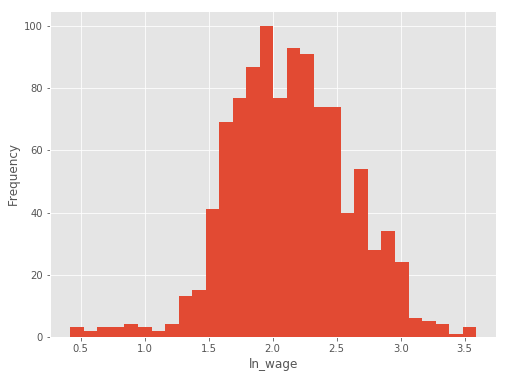

In [5]:
# explore distribution of ln_wage (our dependent variable)
plt.figure(figsize=(8,6))
tobias_koop.ln_wage.plot(kind='hist',bins=30)
plt.xlabel('ln_wage')
plt.show()

In [14]:
# run OLS regression:
formula = 'ln_wage ~educ + pexp + pexp2 + broken_home'

mod = smf.ols(formula,data=tobias_koop)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     51.36
Date:                Mon, 28 Jan 2019   Prob (F-statistic):           1.83e-39
Time:                        09:02:30   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.137      3.353      0.001       0.191       0.730
educ            0.0853      0.009      9.179      0.000       0.067       0.104
pexp            0.2035      0.024      8.629      0.000       0.157       0.250
pexp2          -0.0124      0.002     -5.438      0.000      -0.017      -0.008
broken_home    -0.0087      0.036     -0.244      0.807      -0.079       0.061
==============================================================================
Omnibus:                       55.892   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.050
Skew:                          -0.355   Prob(JB):                     4.66e-25
Kurtosis:                       4.448   Cond. No.                         391.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These standard errors aren't robust (although we could ask for that). As we saw in Cross-Section, we can non-parametrically bootstrap confidence intervals of our parameters. While bootstrapping is implemented in many ols routines, we implement them manually to see how it works:

Steps for bootstrapping:

1. Loop $R$ times ($R$ = # of boostrapped replicates)
2. For each $r\in R$, sample $N$ times with replacement from rows in $\mathbf{Y}$ and $\mathbf{X}$, noting that $N$ is equal to the number of observations in the original dataset $\mathbf{Y}$ and $\mathbf{X}$. Denote each of these samples as $\mathbf{X}_r$ and $\mathbf{Y}_r$.
3. Estimate an OLS model and recover estimate for replicate $r$:  $\hat{\beta}_r = (\mathbf{X}_r'\mathbf{X}_r)^{-1}\mathbf{X}_r'\mathbf{Y}_r$
4. Store results
5. Calculate the standard deviation (our estimate for the standard errors) of each parameter estimate, or construct non-parametric confidence intervals (preferred)

Note, for our purposes we don't need to see the R regression results.  We only need to store them and move on to the next replicate.  Let's investigate further the `res` object we created above.

#### How to Recover OLS Estimates from Statsmodels

In [7]:
# The parameter values can be accessed here
beta = res.params
print(beta)
print("\nExtract the education parameter")
print(beta['educ'])

Intercept      0.460333
educ           0.085273
pexp           0.203521
pexp2         -0.012413
broken_home   -0.008725
dtype: float64

Extract the education parameter
0.08527252257544018


#### Sampling with replacement

Fundamental to the idea of bootstrapping is to sample with replacement to *preserve the shape of the underlying distribution of our parameters*.  We can do this quite easily using numpy tools.

To do this, suppose we want to sample with replacement from 5 rows of data indexed by `[0,1,2,3,4]`.

So we can sample with replacement from row numbers (index) and then use that to select the rows we need for that replicate.  For each replicate, run the model or calculate the statistic we are interested in, store the results, and then repeat for all subsequent replicates.

In [8]:
row_id = np.arange(5)
print(row_id)

for r in range(3):
    this_sample = np.random.choice(row_id,size=row_id.shape[0],replace=True)
    print("\nReplicate", r+1)
    print("Rows to sample for this replicate")
    print(this_sample)

[0 1 2 3 4]

Replicate 1
Rows to sample for this replicate
[3 3 0 2 2]

Replicate 2
Rows to sample for this replicate
[1 2 4 1 0]

Replicate 3
Rows to sample for this replicate
[0 1 0 4 4]


### Bootstrap for our OLS Model

The following code uses the ideas above to perform the following steps for each replicate $r$ of $R$ total replicates:
1. Sample with replacement from *rows* of our dataset
2. Calculate the statistic of interest (our OLS parameter estimates)
3. Store results

In [9]:
# Number of replicates
R = 2000 

# store each r of the R replicates here in rows:
results_boot = np.zeros((R,res.params.shape[0]))

row_id = range(0,tobias_koop.shape[0])

for r in range(R):
    # this samples with replacement from rows in the Tobias and Koop dataset
    this_sample = np.random.choice(row_id, size=tobias_koop.shape[0], 
                                   replace=True) # gives sampled row numbers
    # Define data for this replicate:    
    tobias_koop_r = tobias_koop.iloc[this_sample]   
    # Estimate model
    results_r = smf.ols(formula,data=tobias_koop_r).fit().params
    # Store in row r of results_boot:
    results_boot[r,:] = results_r   

In [10]:
# Convert results to pandas dataframe for easier analysis:
results_boot = pd.DataFrame(results_boot,columns=['b_Intercept','b_educ',
                                                  'b_pexp','pexp2','b_broken_home'])
results_boot.head()

b_Intercept    b_educ    b_pexp     pexp2  b_broken_home
0     0.516443  0.084590  0.192631 -0.011954      -0.020475
1     0.536429  0.081892  0.188008 -0.010909      -0.011127
2     0.546574  0.082957  0.193086 -0.012178      -0.060844
3     0.538592  0.085043  0.157042 -0.007437       0.025669
4     0.517043  0.072795  0.249465 -0.017123       0.011057

In [11]:
results_boot.head(10) # the first 10 replicates

b_Intercept    b_educ    b_pexp     pexp2  b_broken_home
0     0.516443  0.084590  0.192631 -0.011954      -0.020475
1     0.536429  0.081892  0.188008 -0.010909      -0.011127
2     0.546574  0.082957  0.193086 -0.012178      -0.060844
3     0.538592  0.085043  0.157042 -0.007437       0.025669
4     0.517043  0.072795  0.249465 -0.017123       0.011057
5     0.373111  0.093967  0.188873 -0.011453      -0.006648
6     0.601756  0.075410  0.210824 -0.013727      -0.017222
7     0.275512  0.097710  0.207995 -0.012118      -0.063344
8     0.519188  0.079308  0.224261 -0.014568      -0.062704
9     0.309057  0.089263  0.250614 -0.016749       0.011132

In [36]:
results_boot.describe(percentiles=[.005,.025,.05,.5,.95,.975,.995])

b_Intercept       b_educ       b_pexp        pexp2  b_broken_home
count  2000.000000  2000.000000  2000.000000  2000.000000    2000.000000
mean      0.457703     0.085529     0.203003    -0.012339      -0.008579
std       0.131661     0.009761     0.023198     0.002309       0.031360
min       0.011099     0.054331     0.132177    -0.019716      -0.112672
0.5%      0.128958     0.060144     0.145089    -0.018377      -0.090749
2.5%      0.190945     0.066764     0.157006    -0.017058      -0.068715
5%        0.229931     0.069725     0.165560    -0.016214      -0.060446
50%       0.454472     0.085486     0.202763    -0.012333      -0.008532
95%       0.674092     0.101336     0.242734    -0.008461       0.042096
97.5%     0.718687     0.105169     0.250169    -0.007799       0.053368
99.5%     0.815853     0.111149     0.263547    -0.006464       0.073106
max       0.964239     0.117999     0.277995    -0.005241       0.103684

From the above results, we see that the 95% confidence interval for education is in the range [0.0668,0.10517] (approximately, as these numbers will change each time you run the code above).  It is tempting to interpret the confidence intervals above as **There is a 95% chance that $\beta$ is in the range [0.0668,0.10517]**.  However, recall that in the frequentist paradigm $\beta$ is fixed and non-random.  So it is either in the range [0.0668,0.10517] or it isn't.  What is random is the range [0.0668,0.10517].  So a better way to verbalize the confidence interval is  that if you repeated your regression analysis many times, 95% of your calculated confidence interval would contain the true parameter $\beta$.

Let's plot our bootstrap replicates, by parameter.  Note that the values of each of these replicates are completely independent (or should be).  Replicate 3 doesn't in any way inform us about replicate 4.  For each parameter, we show the estimated parameter (solid black line) and two parameter estimates:

1. The standard 95% confidence interval (dashed red line):
$$
CI_i = \hat{\beta}_i \pm 1.96 * \hat{\sigma}_{\beta_i} 
$$
2. The 95% confidence interval calculated based off the 2.5 and 97.5 percentiles from our boostrap database (dashed blue line).

#### Focusing on `educ`

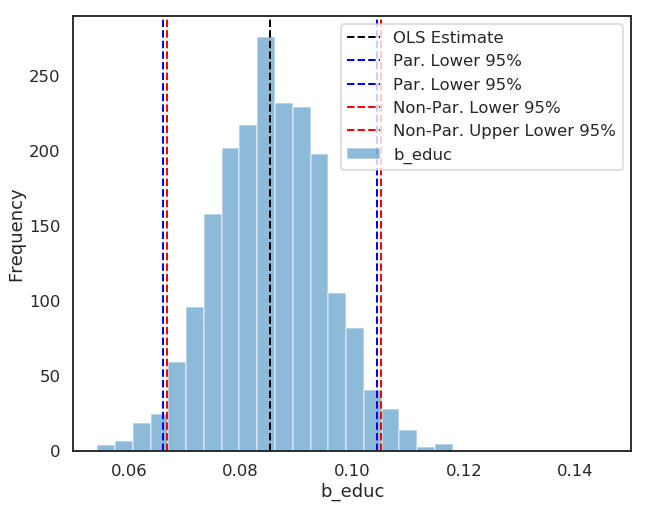

In [37]:
plt.figure(figsize=(10,8))
plt.xlabel('b_educ')
lw = 2
plt.axvline(beta['educ'],color='k',linestyle='dashed',lw=lw,
            label='OLS Estimate')
# Method 1. 95% Parametric CI's
plt.axvline(beta['educ'] -1.96*np.std(results_boot.b_educ),color='b',
            linestyle='dashed',
            lw=lw,label='Par. Lower 95%')
plt.axvline(beta['educ'] +1.96*np.std(results_boot.b_educ),color='b',
            linestyle='dashed',
            lw=lw,label='Par. Lower 95%')
# Method 2. Non-Parametric 95% CI's
plt.axvline(np.percentile(results_boot.b_educ,2.5),color='r',
            linestyle='dashed',
            lw=lw,label='Non-Par. Lower 95%')
plt.axvline(np.percentile(results_boot.b_educ,97.5),color='r',
            linestyle='dashed',
            lw=lw,label='Non-Par. Upper Lower 95%')
# scootch the upper limit of the x-axis a bit to the right for 
# non-overlapping legend
plt.xlim([.05,.15])

results_boot.b_educ.plot(kind='hist',bins=20,alpha=.5)
plt.legend()
plt.show()

#### For all parameters:

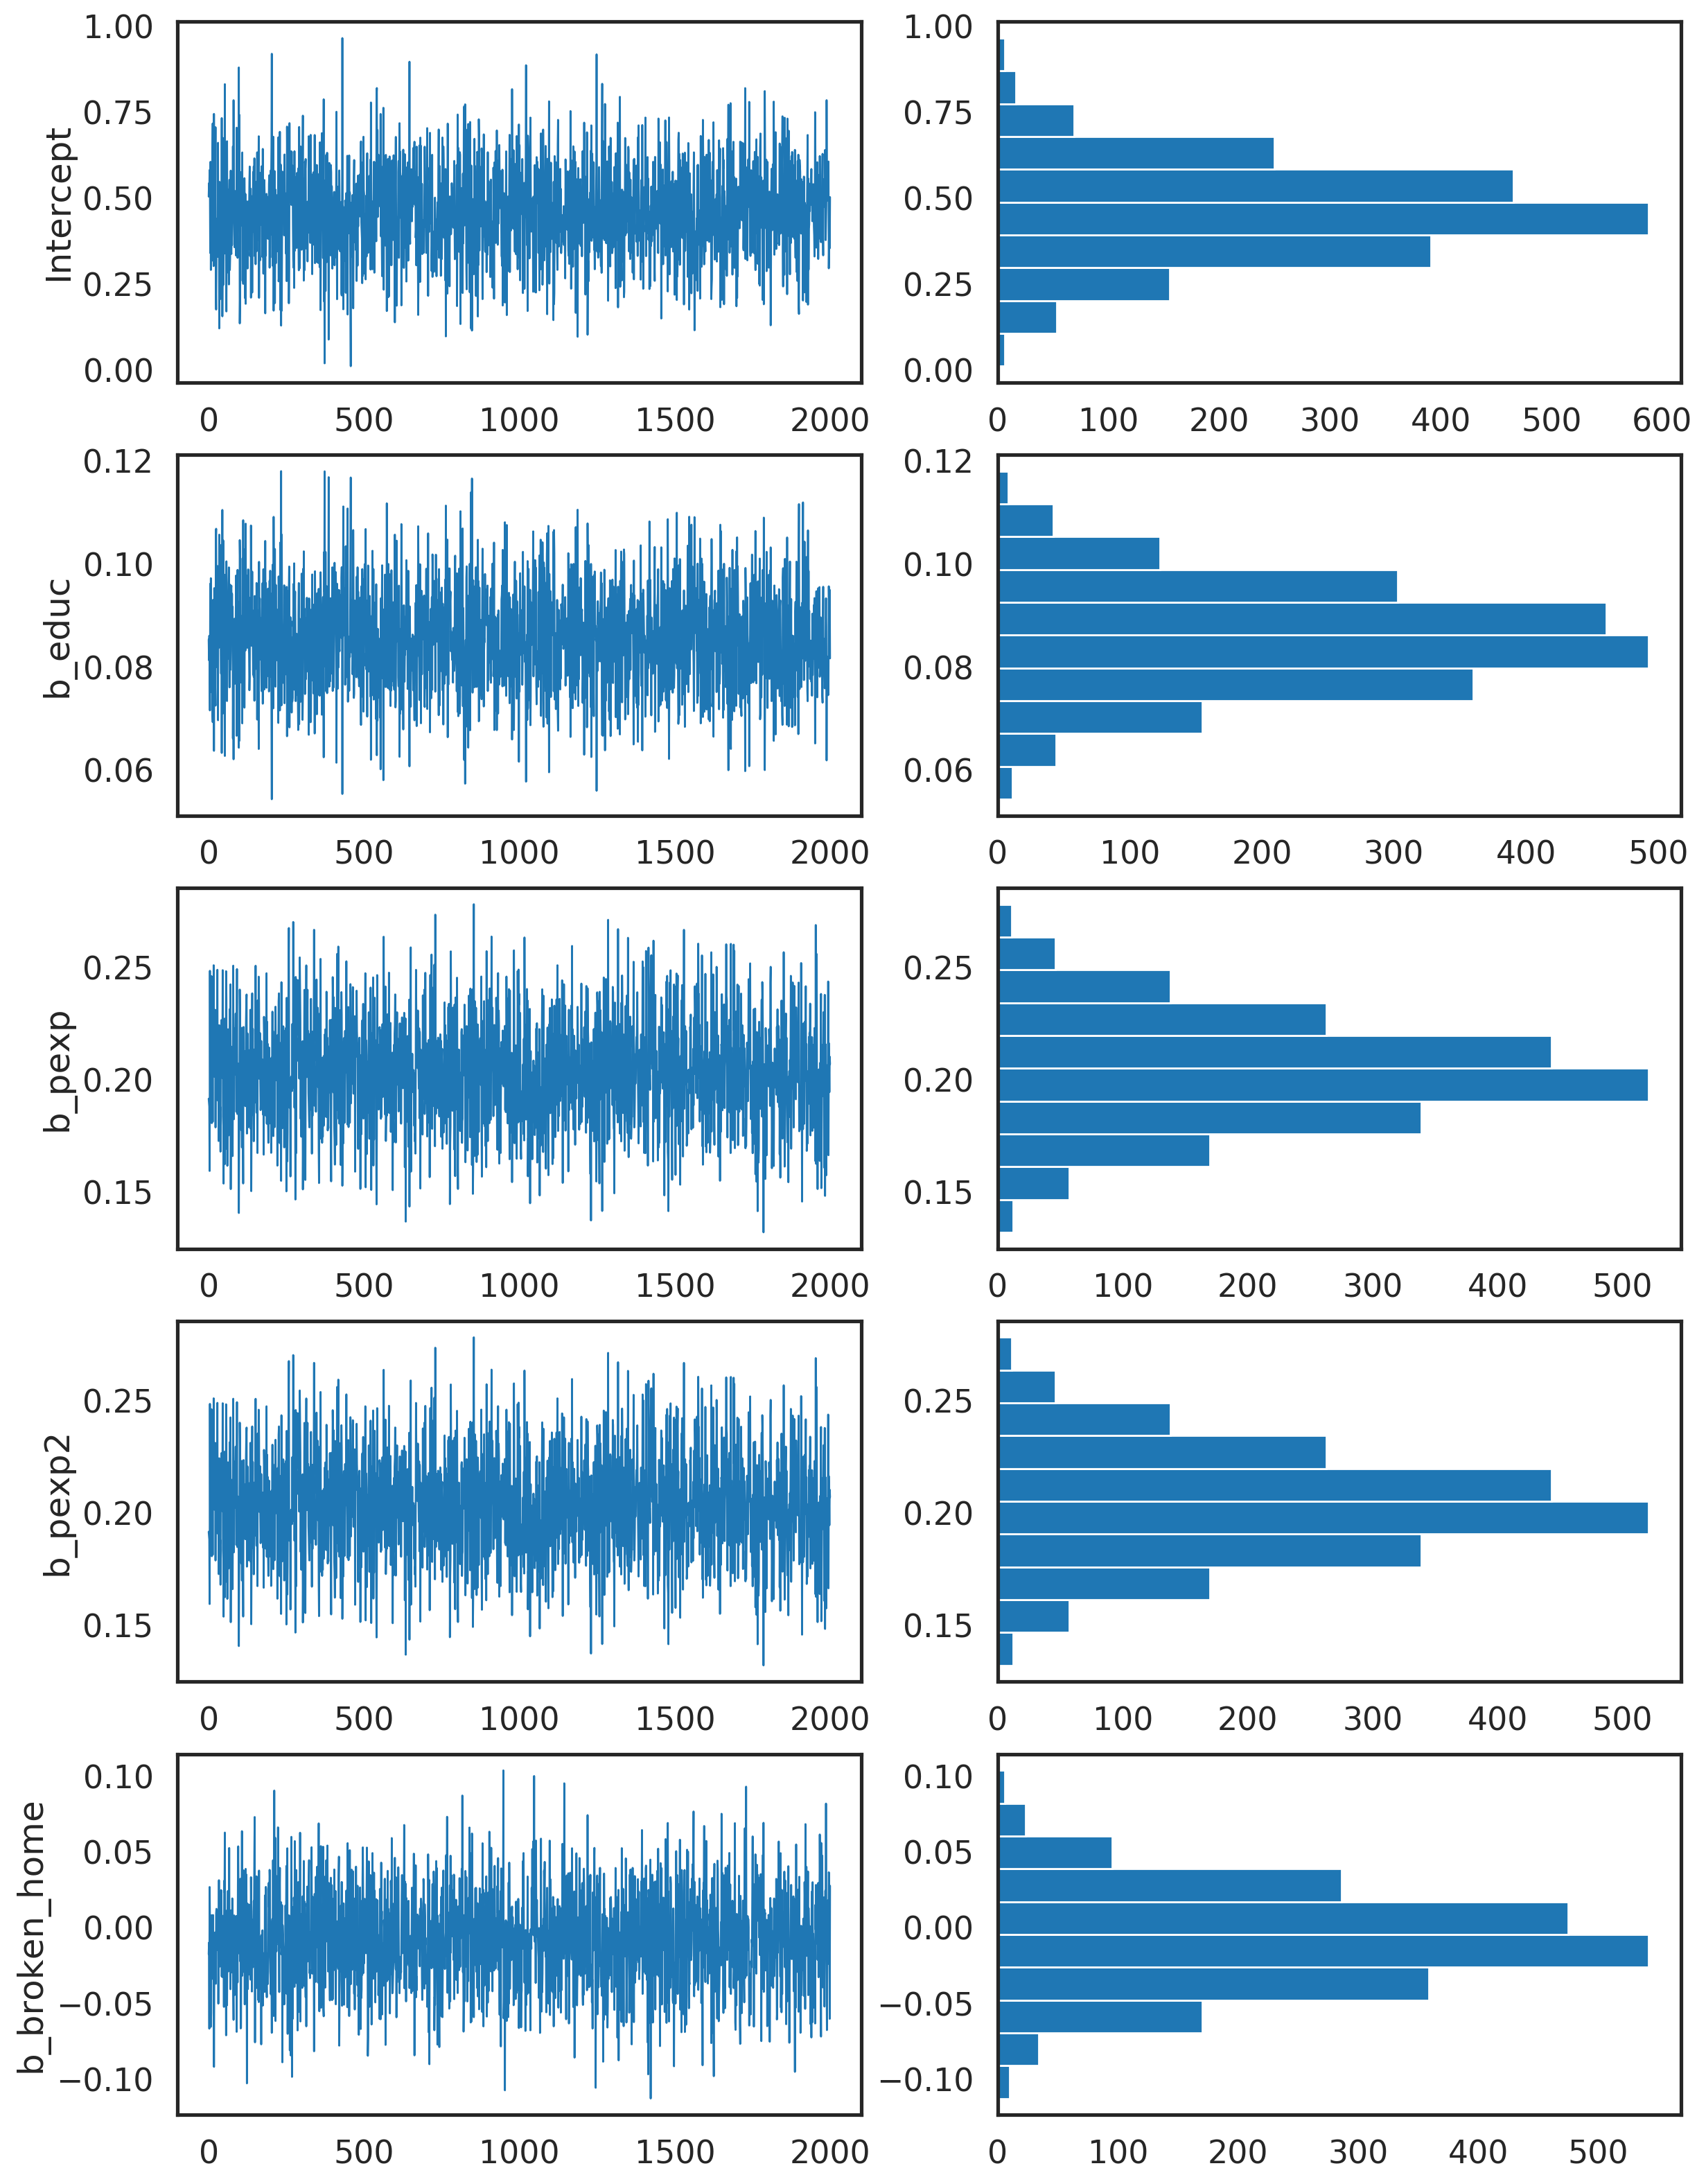

In [29]:
# set x axis values
replicate= np.arange(R)

# plot point estimate and confidence intervals:
plt.figure(figsize=(14, 20), dpi=200)
lw = 1

plt.subplot(521)
plt.ylabel("Intercept")
plt.plot(replicate, results_boot.b_Intercept, label="Intercept",lw=lw)
plt.subplot(522)
plt.hist(results_boot.b_Intercept,lw=lw, label="b_intercept", orientation='horizontal')

plt.subplot(523)
plt.ylabel("b_educ")
plt.plot(replicate, results_boot.b_educ, label="b_educ",lw=lw)
plt.subplot(524)
plt.hist(results_boot.b_educ,lw=lw, label="b_educ",orientation='horizontal')

plt.subplot(525)
plt.ylabel("b_pexp")
plt.plot(replicate, results_boot.b_pexp, label="b_pexp",lw=lw)
plt.subplot(526)
plt.hist(results_boot.b_pexp,lw=lw, label="b_pexp",orientation='horizontal')

plt.subplot(527)
plt.ylabel("b_pexp2")
plt.plot(replicate, results_boot.b_pexp, label="b_pexp2",lw=lw)
plt.subplot(528)
plt.hist(results_boot.b_pexp,lw=lw, label="b_pexp2",orientation='horizontal')

plt.subplot(529)
plt.ylabel("b_broken_home")
plt.plot(replicate, results_boot.b_broken_home, label="b_broken_home",lw=lw)
plt.subplot(5,2,10)
plt.hist(results_boot.b_broken_home,lw=lw, label="b_broken_home",orientation='horizontal')
plt.show()

## Visualizing Covariances $\beta$:

<Figure size 720x576 with 0 Axes>

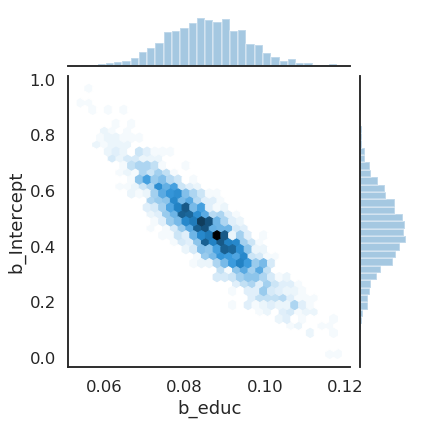

In [31]:
plt.figure(figsize=(10,8));
sbn.jointplot(results_boot['b_educ'],results_boot['b_Intercept'],kind='hex');
plt.show()

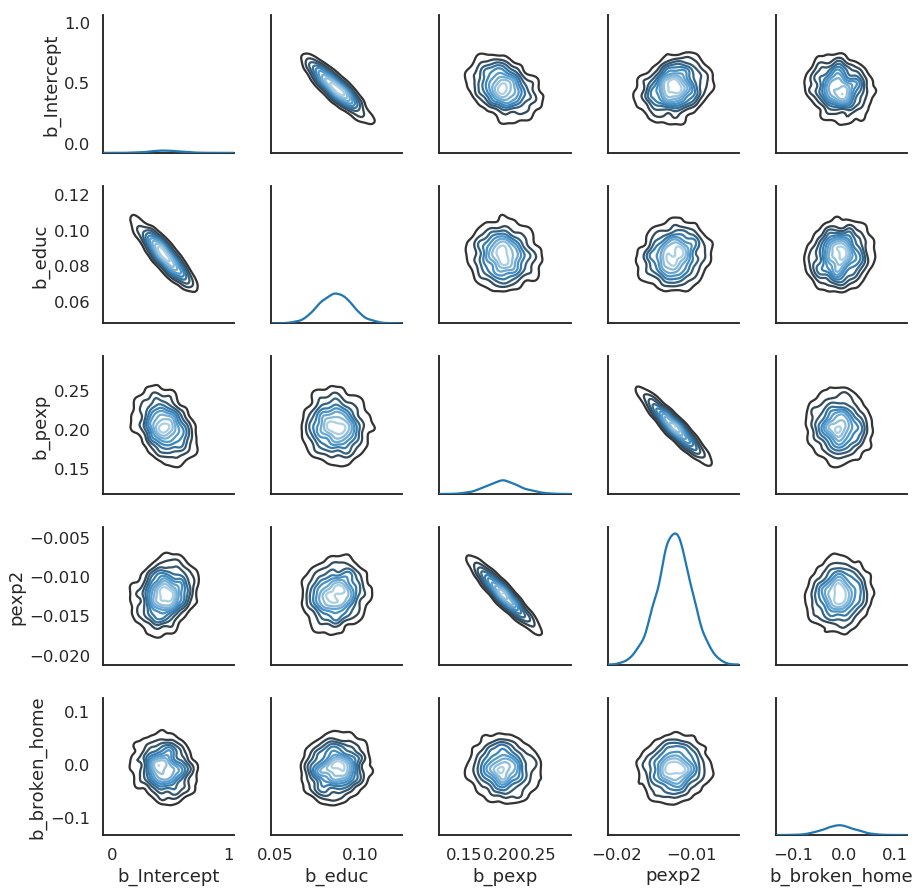

In [34]:
g = sbn.PairGrid(results_boot)
g.map_diag(sbn.kdeplot)
g.map_offdiag(sbn.kdeplot, cmap="Blues_d")
plt.show()